# Stock Price Indicator
                
## Project aims to predict adjusted close price of some stocks chosen previously.


## 1- Data Exploration
### A- get historical values
### B- plot Adjusted Close column
### C- check for null values


In [4]:
#A- get historical values

import pandas as pd
import pandas_datareader as pdr
import datetime

adjclose = 'Adj Close'

stock_list = ['AAPL', 'AMZN', 'AVGO', 'CSCO', 'MA', 'MSFT', 'NVDA', 'NVS', 'PFE', 'QCOM', 'TXN', 'V', 'WMT']

start=datetime.datetime(2010,3,20)

end=datetime.datetime(2019,3,19)

#for stock in stock_list:
    #history = pdr.get_data_yahoo(stock, start, end)
    #history.to_csv('./data1/'+stock+'.csv')

AMZN = pd.read_csv('data/AMZN.csv', header=0, parse_dates=['Date'])
AMZN.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-03-22,130.960007,128.639999,130.199997,130.470001,5383400,130.470001
1,2010-03-23,130.940002,128.070007,130.889999,129.259995,4213100,129.259995
2,2010-03-24,129.399994,127.199997,128.639999,128.039993,4696400,128.039993
3,2010-03-25,136.910004,128.039993,129.139999,134.729996,16209600,134.729996
4,2010-03-26,136.990005,133.759995,134.899994,135.059998,6565700,135.059998


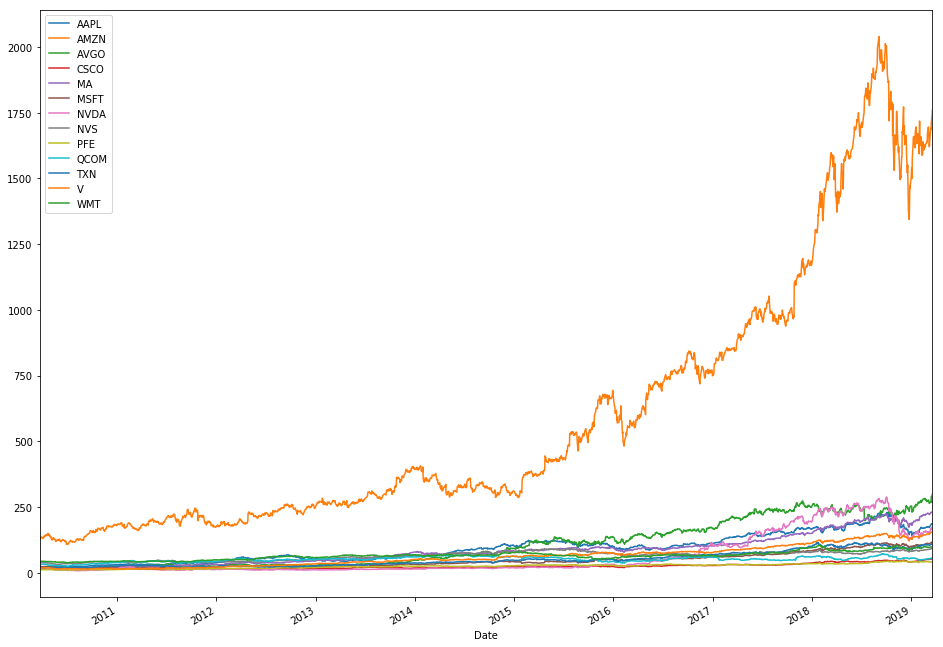

In [5]:
# B- plot Adjusted Close column

import datetime
import matplotlib as plt

stock_data_list = []

for stock in stock_list:
    stock_data = pd.read_csv('data/'+stock+'.csv', header=0, parse_dates=['Date'])
    stock_data.set_index('Date',inplace=True)
    plott = stock_data[adjclose].plot(figsize=(16, 12), label=stock)
    plott.legend()
    stock_data['stock_name'] = stock
    stock_data_list.append(stock_data)



In [6]:
# C- check for null values

for stock_data in stock_data_list:
    print(stock_data.isnull().any().any())

False
False
False
False
False
False
False
False
False
False
False
False
False


## Domain Research
### Add Key Feature Columns to Data

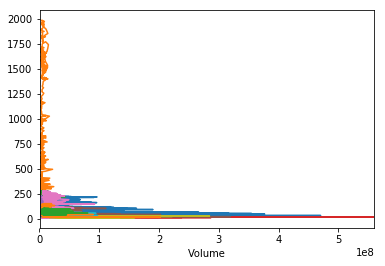

In [45]:
import numpy as np
#Add MACD 26, 12 day periods
def add_MACD(dataframe):
    macd26 = dataframe[adjclose].ewm(span=26, min_periods=26, adjust= True).mean()
    macd12 = dataframe[adjclose].ewm(span=12, min_periods=12, adjust= True).mean()
    dataframe["MACD"] = macd26-macd12
    return dataframe

#Add RSI Wilder's RSI
def add_RSI(df, column=adjclose, period=14):
    delta = df[column].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=period - 1,  adjust=False).mean()
    rDown = down.ewm(com=period - 1, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)    
    return df.join(rsi.to_frame('RSI'))

#Add Bollinger Bands
def add_BollingerBand(df, column=adjclose, period=20):
    sma = df[column].rolling(window=period, min_periods=period - 1).mean()
    std = df[column].rolling(window=period, min_periods=period - 1).std()

    up = (sma + (std * 2)).to_frame('BBANDUP')
    lower = (sma - (std * 2)).to_frame('BBANDLO')
    return df.join(up).join(lower)

def get_weighted_average(dataframe,window,columnname_data,columnname_weights):
    processed_dataframe=dataframe.loc[:,(columnname_data,columnname_weights)].set_index(columnname_weights)   
    def get_mean_withweights(processed_dataframe_windowed):
        return np.average(a=processed_dataframe_windowed,weights=processed_dataframe_windowed.index)
    return processed_dataframe.rolling(window=window).apply(func=get_mean_withweights,raw=False)

#Add weighted moving average
#def add_wma(df, columnMean= adjclose, columnWeights='Volume',period=10, addedColumnName):
#    weights_window = df['']
#    wma = df[columnMean].rolling(window=period).apply(f())
#    df.join(wma.to_frame(addedColumnName))


for stock_data in stock_data_list:
    stock_data = add_MACD(stock_data)
    stock_data = add_RSI(stock_data)
    stock_data = add_BollingerBand(stock_data)
    df_sth = get_weighted_average(stock_data,10,adjclose, 'Volume')
    #stock_data['MACD'].plot(figsize=(16, 12), label=stock_data['stock_name'][0])
    #stock_data['RSI'].plot(figsize=(16, 12), label=stock_data['stock_name'][0])
    #stock_data['BBANDUP'].plot(figsize=(16, 12), label=stock_data['stock_name'][0])
    #stock_data['BBANDLO'].plot(figsize=(16, 12), label=stock_data['stock_name'][0])
    df_sth[adjclose].plot();
    plott.legend()
    
    
    
    
    
    





2- Data Normalization

In [ ]:

for stock_data in stock_data_list:
    print(stock_data.isnull().any().any())

In [8]:
from sklearn import preprocessing
df = stock_data_list[0]
df = df.drop('stock_name', axis = 1)
df = df.drop('Volume', axis = 1)
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Adj Close'], dtype='object')

Index(['High', 'Low', 'Open', 'Close', 'Adj Close'], dtype='object')


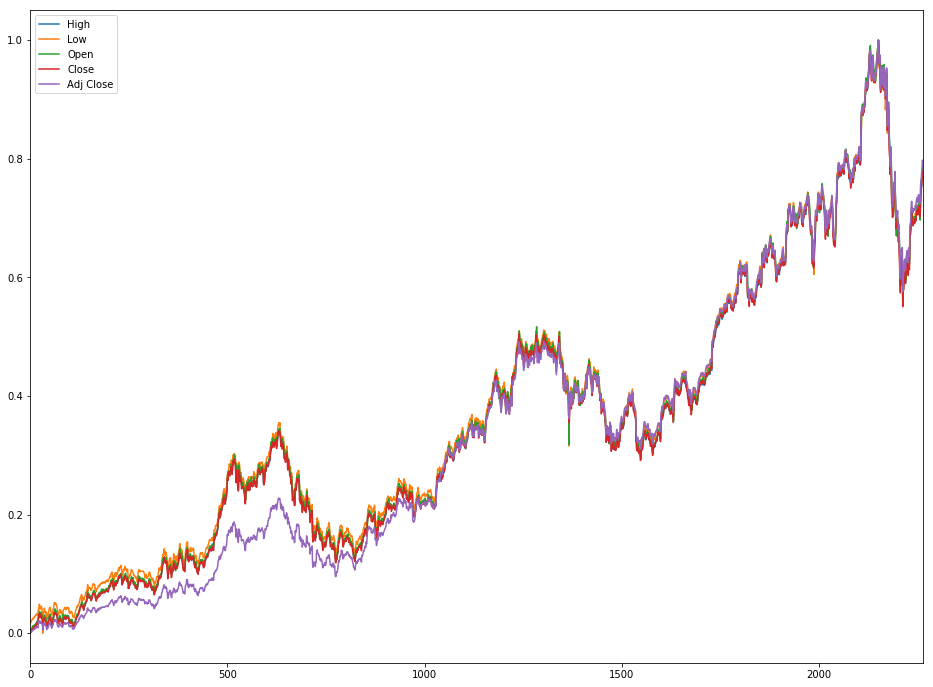

In [9]:



# Get column names first
names = df.columns
print(names)
# Create the Scaler object
scaler = preprocessing.MinMaxScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

scaled_df.plot(figsize=(16,12))


In [99]:
print(scaled_df)

          High       Low      Open     Close  Adj Close
0     0.480611  0.468170  0.468851  0.477953   0.318700
1     0.478279  0.468495  0.471715  0.477401   0.318332
2     0.477335  0.471757  0.472027  0.475614   0.317141
3     0.479452  0.469654  0.479348  0.470484   0.313720
4     0.477995  0.470988  0.471812  0.475831   0.317285
5     0.476741  0.472154  0.474967  0.473724   0.315880
6     0.477250  0.470758  0.475481  0.473974   0.316047
7     0.476867  0.472534  0.474610  0.473622   0.315813
8     0.479413  0.467404  0.476762  0.473870   0.315978
9     0.477607  0.470117  0.470538  0.477567   0.318443
10    0.477137  0.470702  0.473086  0.475747   0.317230
11    0.477675  0.471238  0.472995  0.475068   0.316777
12    0.477393  0.470475  0.475219  0.474250   0.316232
13    0.475230  0.472421  0.474326  0.475034   0.316754
14    0.475765  0.473299  0.474063  0.474239   0.316224
15    0.475725  0.472414  0.473884  0.475000   0.316732
16    0.475393  0.472028  0.474368  0.475161   0

In [15]:
from sklearn.preprocessing import MinMaxScaler
X = [[4, 1, 2, 2],
     [1, 3, 9, 3],
     [5, 7, 5, 1]]
transformer = MinMaxScaler().fit(X) # fit does nothing.
transformer

transformer.transform(X)

array([[0.75      , 0.        , 0.        , 0.5       ],
       [0.        , 0.33333333, 1.        , 1.        ],
       [1.        , 1.        , 0.42857143, 0.        ]])